<a href="https://colab.research.google.com/github/AybarsCebi/CS412-Machine-Learning-Course-Sabanci-University/blob/main/CS412_HW4_mcebi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS412 - Machine Learning - 2024-2025
## Homework 4


## Dataset
[**CelebA**](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google Drive. You must upload both CelebA30k.zip and CelebA30k.csv to your Drive without renaming them.
CelebA30k is a smaller version of the original CelebA dataset, containing 30,000 images, to reduce computation time during training.
Split the data as follows: reserve 10% of the samples for validation and 10% for testing (i.e., 3,000 samples). The remaining 80% should be used for training.
Important: The test set (3,000 samples) must be used only for final evaluation and not for model selection or hyperparameter tuning.**

## Task

Build a gender classifier using the PyTorch library and a pretrained VGG-16 model on the CelebA dataset. Your goal is to complete the given code without changing the base architecture of VGG-16 (other than replacing the classification head suitable for binary classification).

You will:
- Freeze the convolutional layers of the pretrained model  
- Replace the classifier head with your own binary classification layer  
- Fine-tune the model on the given subset of CelebA  
- Experiment with different values of learning rate, batch size, and number of epochs  

**Dataset:** CelebA  
**Model:** VGG-16
**Library:** PyTorch  

---

## Software

You will use the PyTorch framework for this homework. PyTorch offers flexible tools for deep learning, including pretrained models, custom training loops, and GPU acceleration.

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you change your runtime to GPU.

## 2) Load training dataset

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import necessary libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms

from torch.utils.data import DataLoader, Dataset

# For reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/CelebA30k.csv') # enter the file path on your drive for the csv file
data.head()

,filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
gender_data = data[['filename', 'Male']].copy()
gender_data['Male'] = gender_data['Male'].map({-1: 0, 1: 1})
gender_data.head()

,filename,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
# This will extract the contents of the zip file into a folder named data
# Do not extract the zip into your google drive

!unzip "/content/drive/My Drive/CelebA30k.zip" -d "/content/data"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data/CelebA30k/027646.jpg  
  inflating: /content/data/CelebA30k/007596.jpg  
  inflating: /content/data/CelebA30k/028575.jpg  
  inflating: /content/data/CelebA30k/024367.jpg  
  inflating: /content/data/CelebA30k/023408.jpg  
  inflating: /content/data/CelebA30k/022716.jpg  
  inflating: /content/data/CelebA30k/025079.jpg  
  inflating: /content/data/CelebA30k/003900.jpg  
  inflating: /content/data/CelebA30k/017975.jpg  
  inflating: /content/data/CelebA30k/029643.jpg  
  inflating: /content/data/CelebA30k/026570.jpg  
  inflating: /content/data/CelebA30k/009593.jpg  
  inflating: /content/data/CelebA30k/019780.jpg  
  inflating: /content/data/CelebA30k/008855.jpg  
  inflating: /content/data/CelebA30k/006878.jpg  
  inflating: /content/data/CelebA30k/020101.jpg  
  inflating: /content/data/CelebA30k/019958.jpg  
  inflating: /content/data/CelebA30k/027108.jpg  
  inflating: /content/data/CelebA30k/001871.jpg  
  i

In [ ]:
first_image_path = os.path.join("/content/data/CelebA30k/", gender_data.loc[0,"filename"])
img = Image.open(first_image_path)

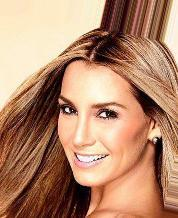

In [ ]:
img

# Starting here, you’ll need to fill in the code cells on your own.

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as distribution of labels, etc.


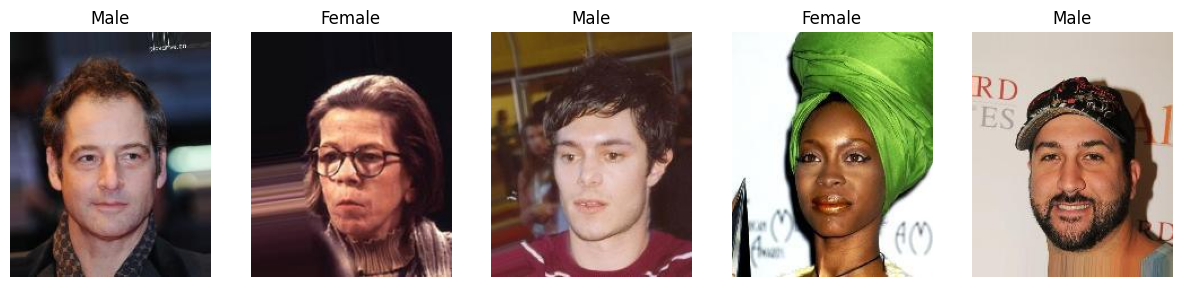

Female: 17320  Male: 12680


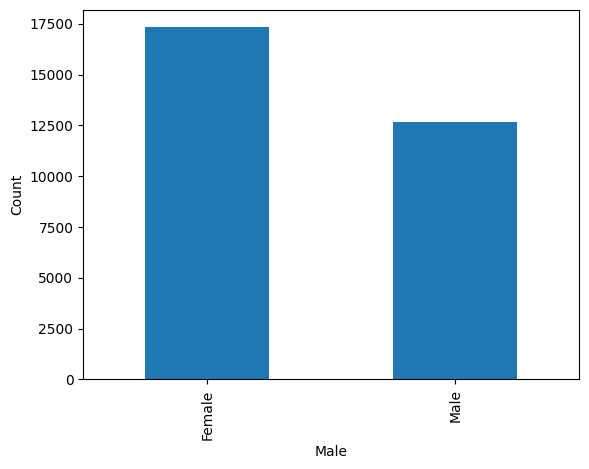

In [ ]:
gender_data['Male'] = (gender_data['Male'] == 1).astype(int)
five = gender_data.sample(5, random_state=42).reset_index(drop=True)
fig, axes = plt.subplots(1, 5, figsize=(15,5))
for i, row in five.iterrows():
    img = Image.open(os.path.join("/content/data/CelebA30k", row['filename'])).convert("RGB")
    axes[i].imshow(img)
    axes[i].set_title("Male" if row['Male']==1 else "Female")
    axes[i].axis('off')
plt.show()
counts = gender_data['Male'].value_counts()
if 1 not in counts.index:
    counts[1] = 0

print(f"Female: {counts[0]}  Male: {counts[1]}")
counts.plot.bar()
plt.xticks([0,1], ['Female','Male'])
plt.ylabel("Count")
plt.show()

##4) Split the dataset as train (80%), validation (10%) and test (10%) set.

*   Liste öğesi
*   Liste öğesi



In [ ]:
train_data, temp_data = train_test_split(
    gender_data,
    test_size=0.2,
    stratify=gender_data['Male'],
    random_state=42
)
val_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    stratify=temp_data['Male'],
    random_state=42
)
train_data = train_data.reset_index(drop=True)
val_data   = val_data.reset_index(drop=True)
test_data  = test_data.reset_index(drop=True)
print(f"Train: {len(train_data)}\nVal: {len(val_data)}\nTest: {len(test_data)}")

Train: 24000
Val: 3000
Test: 3000


## 5) Preparing the Data

In this section, you will implement the dataset loading and preprocessing pipeline using PyTorch.

You are provided with:
- `train_df` and `val_df` dataframes, which include two columns: `filename`  and `Male`
- A directory path (`/content/data/CelebA30k`) that contains the image files

Your task is to:
1. Define appropriate transformations using `torchvision.transforms` for the training and validation sets
   - Resize images to 224x224
   - Convert them to tensors
   - Normalize them (you can use `[0.5], [0.5]` for simplicity)
   - Add data augmentation (e.g., horizontal flip) for training
2. Write a custom `Dataset` class that reads images and labels from the dataframe
3. Create `DataLoader` objects for training and validation with an appropriate batch size

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])
val_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])

class CelebADataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        path = os.path.join(self.img_dir, row['filename'])
        image = Image.open(path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row['Male'], dtype=torch.float32)
        return image, label

img_dir = "/content/data/CelebA30k"
train_dataset = CelebADataset(train_data, img_dir, train_transforms)
val_dataset   = CelebADataset(val_data,   img_dir, val_transforms)
test_dataset  = CelebADataset(test_data,  img_dir, val_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,  num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=64, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=64, shuffle=False, num_workers=2)

## 6) Transfer Learning with VGG-16

We will create the base model from the well-known VGG-16 architecture available in torchvision.models. This model is pretrained on the ImageNet dataset, a large dataset containing 1.4 million images and 1,000 object categories.

In transfer learning, we use the convolutional base of the pretrained model as a feature extractor. However, we do not use the last fully connected layer, which is specific to ImageNet’s 1,000-class classification task. Instead, we will:
- Keep the convolutional layers (which extract general visual features)
- Remove the final classification layer
- Replace it with our own binary classifier (for gender classification)

This is a common strategy because the layer before the original classification head (the so-called "bottleneck layer") retains high-level, general features useful for a wide range of vision tasks.

### Instructions

You should:
1. Load the VGG-16 model with pretrained=True from torchvision.models.
2. Replace the classifier head with a new sequence of layers suitable for binary classification:
   - The final output should have one neuron (output dimension = 1).
   - Do not apply a Sigmoid activation after the output layer, because the loss function you will use internally applies it.


In [ ]:
model = models.vgg16(pretrained=True)

# a) Freeze all convolutional layers
for param in model.features.parameters():
    param.requires_grad = False

# b) Replace the classifier head with a single-output layer
in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(in_features, 1)

model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 64.6MB/s]


## 7) Fine-Tuning and Training the Model

Now that your VGG-16 base model is set up with a new binary classification head, it’s time to fine-tune and train it using your `train_loader` and evaluate it using your `val_loader`.

You will:
- Experiment with two different fine-tuning strategies:
  - Freeze all convolutional layers and train only the classifier head.
  - Unfreeze the last convolutional block and the classifier head, and train them.
- Choose an appropriate optimizer (e.g., `torch.optim.SGD` or `Adam`).
- Use `nn.BCEWithLogitsLoss()` as the loss function.
  - Note: Since you are using nn.BCEWithLogitsLoss(), your model's output should not have a Sigmoid activation. This loss function applies the Sigmoid operation internally.
- Implement a training loop that includes validation after each epoch.
- Monitor both training and validation performance across epochs.

Hyperparameter Tuning:
- Try two different learning rates: 0.001 and 0.0001.
- The number of training epochs must be fixed to 10.
- You may adjust batch size depending on available GPU memory, but typically 32 or 64 is suggested.

Finally, you should report:
- Final training and validation accuracy for each configuration.
- A plot showing training and validation loss across epochs.
- A brief discussion comparing the results for different fine-tuning strategies and learning rates, identifying which combination performed best and why.


In [ ]:
import copy

criterion = nn.BCEWithLogitsLoss()
epochs = 10
learning_rates = [1e-3, 1e-4]

best_val_loss = float('inf')
best_wts = None

def train_epoch(net, loader, optimizer):
    net.train()
    total_loss = total_correct = total_samples = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device).view(-1,1)
        optimizer.zero_grad()
        outputs = net(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = (outputs > 0).float()
        total_loss += loss.item() * imgs.size(0)
        total_correct += (preds == labels).sum().item()
        total_samples += imgs.size(0)
    return total_loss/total_samples, total_correct/total_samples


def evaluation_epoch(net, loader):
    net.eval()
    total_loss = total_correct = total_samples = 0
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device).view(-1,1)
            outputs = net(imgs)
            loss = criterion(outputs, labels)
            preds = (outputs > 0).float()
            total_loss += loss.item() * imgs.size(0)
            total_correct += (preds == labels).sum().item()
            total_samples += imgs.size(0)
    return total_loss/total_samples, total_correct/total_samples

for strategy in [1, 2]:
    for lr in learning_rates:
        print(f"\nStrategy {strategy}, LR={lr}")
        net = models.vgg16(pretrained=True)
        for p in net.features.parameters():
            p.requires_grad = False
        if strategy == 2:
            for layer in net.features[24:]:
                for p in layer.parameters():
                    p.requires_grad = True
        in_f = net.classifier[6].in_features
        net.classifier[6] = nn.Linear(in_f, 1)
        net = net.to(device)
        optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=lr)

        for epoch in range(1, epochs+1):
            train_loss, train_accuracy = train_epoch(net, train_loader, optimizer)
            val_loss, val_accuracy = evaluation_epoch(net, val_loader)
            print(f"Epoch {epoch:2d}: Train loss: {train_loss:.4f}, Axxuracy: {train_accuracy:.4f} | "
                  f"Val loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_wts = copy.deepcopy(net.state_dict())

# Save best model
torch.save(best_wts, "best_model.pth")
print(f"Best validation loss: {best_val_loss:.4f}")


Strategy 1, LR=0.001
Epoch  1: Train loss: 0.2393, Axxuracy: 0.9113 | Val loss: 0.1840, Accuracy: 0.9260
Epoch  2: Train loss: 0.1556, Axxuracy: 0.9443 | Val loss: 0.1885, Accuracy: 0.9377
Epoch  3: Train loss: 0.1321, Axxuracy: 0.9522 | Val loss: 0.1388, Accuracy: 0.9460
Epoch  4: Train loss: 0.1219, Axxuracy: 0.9568 | Val loss: 0.2357, Accuracy: 0.9340
Epoch  5: Train loss: 0.1047, Axxuracy: 0.9638 | Val loss: 0.1454, Accuracy: 0.9497
Epoch  6: Train loss: 0.0907, Axxuracy: 0.9689 | Val loss: 0.1461, Accuracy: 0.9450
Epoch  7: Train loss: 0.0832, Axxuracy: 0.9725 | Val loss: 0.1868, Accuracy: 0.9493
Epoch  8: Train loss: 0.0671, Axxuracy: 0.9769 | Val loss: 0.2342, Accuracy: 0.9477
Epoch  9: Train loss: 0.0751, Axxuracy: 0.9765 | Val loss: 0.2132, Accuracy: 0.9490
Epoch 10: Train loss: 0.0639, Axxuracy: 0.9801 | Val loss: 0.2402, Accuracy: 0.9490

Strategy 1, LR=0.0001
Epoch  1: Train loss: 0.1847, Axxuracy: 0.9261 | Val loss: 0.1427, Accuracy: 0.9440
Epoch  2: Train loss: 0.1188, A

## 8) Test your classifier on Test set

- Use your model to predict the labels of the test set and report the final accuracy.

In [ ]:
best_model = models.vgg16(pretrained=True)
best_model.classifier[6] = nn.Linear(best_model.classifier[6].in_features, 1)
best_model.load_state_dict(torch.load("best_model.pth"))
best_model = best_model.to(device)
best_model.eval()

# 8.2) Evaluate on the test set
criterion = nn.BCEWithLogitsLoss()
running_loss = 0.0
running_corrects = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)

        preds = (outputs > 0).float()
        running_corrects += (preds == labels).sum().item()
        total += labels.size(0)

test_loss = running_loss / total
test_acc  = running_corrects / total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0722
Test Accuracy: 0.9733


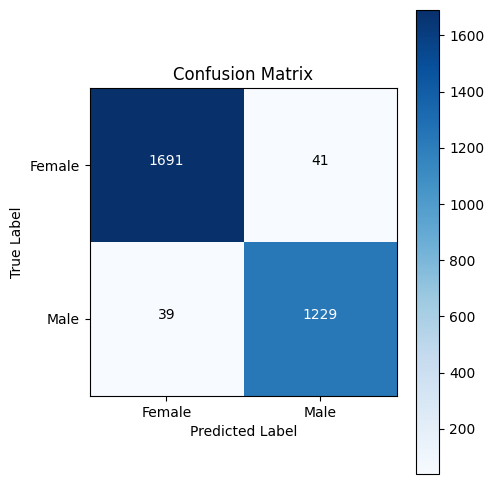

In [ ]:
from sklearn.metrics import confusion_matrix
best_model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = best_model(inputs)
        # logits > 0 corresponds to sigmoid(logits)>0.5
        preds = (outputs > 0).int().cpu().flatten()
        y_pred.extend(preds.tolist())
        y_true.extend(labels.int().tolist())

# 2) Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 3) Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Female', 'Male'])
plt.yticks(tick_marks, ['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate the counts in each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()


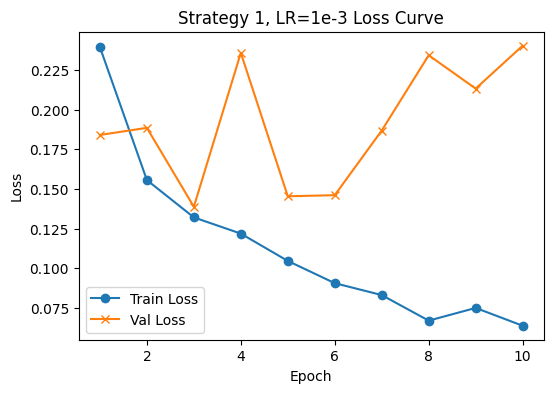

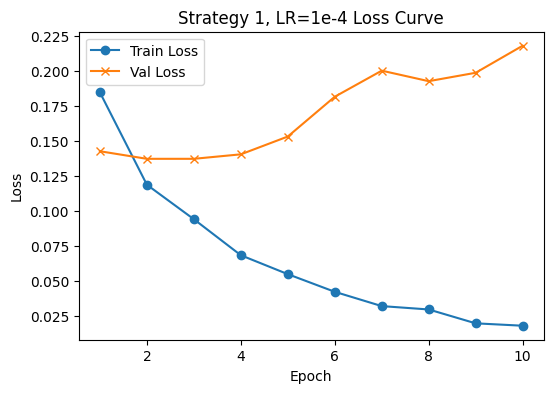

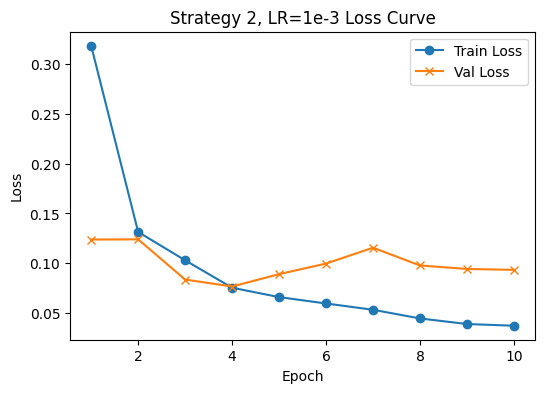

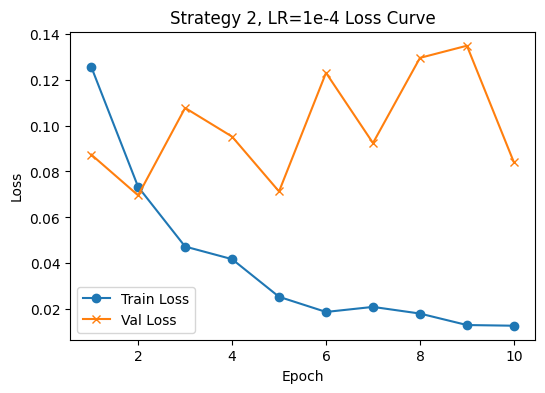

In [ ]:
train_loss_st1_1e3 = [
    0.2393, 0.1556, 0.1321, 0.1219, 0.1047,
    0.0907, 0.0832, 0.0671, 0.0751, 0.0639
]

val_loss_st1_1e3 = [
    0.1840, 0.1885, 0.1388, 0.2357, 0.1454,
    0.1461, 0.1868, 0.2342, 0.2132, 0.2402
]

train_loss_st1_1e4 = [
    0.1847, 0.1188, 0.0942, 0.0685, 0.0550,
    0.0424, 0.0322, 0.0298, 0.0199, 0.0182
]

val_loss_st1_1e4 = [
    0.1427, 0.1373, 0.1373, 0.1405, 0.1532,
    0.1816, 0.2002, 0.1927, 0.1987, 0.2180
]

train_loss_st2_1e3 = [
    0.3181, 0.1314, 0.1030, 0.0755, 0.0661,
    0.0597, 0.0534, 0.0447, 0.0391, 0.0374
]

val_loss_st2_1e3 = [
    0.1238, 0.1240, 0.0837, 0.0767, 0.0891,
    0.0997, 0.1156, 0.0978, 0.0943, 0.0934
]

train_loss_st2_1e4 = [
    0.1257, 0.0733, 0.0473, 0.0418, 0.0254,
    0.0188, 0.0210, 0.0181, 0.0131, 0.0128
]

val_loss_st2_1e4 = [
    0.0874, 0.0696, 0.1077, 0.0952, 0.0713,
    0.1230, 0.0924, 0.1295, 0.1348, 0.0840
]

configs = [
    ("Strategy 1, LR=1e-3", train_loss_st1_1e3, val_loss_st1_1e3),
    ("Strategy 1, LR=1e-4", train_loss_st1_1e4, val_loss_st1_1e4),
    ("Strategy 2, LR=1e-3", train_loss_st2_1e3, val_loss_st2_1e3),
    ("Strategy 2, LR=1e-4", train_loss_st2_1e4, val_loss_st2_1e4),
]

for title, tr_loss, vl_loss in configs:
    epochs = range(1, 11)
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, tr_loss, '-o', label='Train Loss')
    plt.plot(epochs, vl_loss, '-x', label='Val Loss')
    plt.title(f"{title} Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:

# 2) I loaded the saved model because of Colab GPU collapsed.
checkpoint = torch.load("/content/drive/MyDrive/best_model.pth", map_location=device)
model.load_state_dict(checkpoint)
model.eval()
best_model = model
